### In this notebook we explore the effect of using ensemble methods to classify safe or unsafe loans

In [1]:
%cd 'C:\Users\Rolex James\Documents\MOOCs\ML Univ of Washington\Classification\Resources\machine-learning-specialization-master\course-3'

C:\Users\Rolex James\Documents\MOOCs\ML Univ of Washington\Classification\Resources\machine-learning-specialization-master\course-3


In [2]:
import numpy as np
import graphlab as gl

In [3]:
#Load the dataset
loans = gl.SFrame('lending-club-data.gl/')

This non-commercial license of GraphLab Create is assigned to tolurotimibabalola@gmail.com and will expire on December 29, 2016. For commercial licensing options, visit https://dato.com/buy/.


2016-06-12 16:11:46,788 [INFO] graphlab.cython.cy_server, 176: GraphLab Create v1.9 started. Logging: C:\Users\ROLEXJ~1\AppData\Local\Temp\graphlab_server_1465744279.log.0


In [4]:
#Recode the 'bad_loans' column in a more intuitive way
loans['safe_loans'] = loans['bad_loans'].apply(lambda x: +1 if x==0 else -1)
loans.remove_column('bad_loans')

id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade
1077501,1296599,5000,5000,4975,36 months,10.65,162.87,B,B2
1077430,1314167,2500,2500,2500,60 months,15.27,59.83,C,C4
1077175,1313524,2400,2400,2400,36 months,15.96,84.33,C,C5
1076863,1277178,10000,10000,10000,36 months,13.49,339.31,C,C1
1075269,1311441,5000,5000,5000,36 months,7.9,156.46,A,A4
1072053,1288686,3000,3000,3000,36 months,18.64,109.43,E,E1
1071795,1306957,5600,5600,5600,60 months,21.28,152.39,F,F2
1071570,1306721,5375,5375,5350,60 months,12.69,121.45,B,B5
1070078,1305201,6500,6500,6500,60 months,14.65,153.45,C,C3
1069908,1305008,12000,12000,12000,36 months,12.69,402.54,B,B5


In [5]:
#I define two different features list to use for boosting

features_1 = ['grade', # grade of the loan
'sub_grade', # sub-grade of the loan
'short_emp', # one year or less of employment
'emp_length_num', # number of years of employment
'home_ownership', # home_ownership status: own, mortgage or rent
'dti', # debt to income ratio
'purpose', # the purpose of the loan
'term', # the term of the loan
'last_delinq_none', # has borrower had a delinquincy
'last_major_derog_none', # has borrower had 90 day or worse rating
'revol_util', # percent of available credit being used
'total_rec_late_fee', # total late fees received to day
]

features = ['grade',                     # grade of the loan (categorical)
            'sub_grade_num',             # sub-grade of the loan as a number from 0 to 1
            'short_emp',                 # one year or less of employment
            'emp_length_num',            # number of years of employment
            'home_ownership',            # home_ownership status: own, mortgage or rent
            'dti',                       # debt to income ratio
            'purpose',                   # the purpose of the loan
            'payment_inc_ratio',         # ratio of the monthly payment to income
            'delinq_2yrs',               # number of delinquincies 
            'delinq_2yrs_zero',          # no delinquincies in last 2 years
            'inq_last_6mths',            # number of creditor inquiries in last 6 months
            'last_delinq_none',          # has borrower had a delinquincy
            'last_major_derog_none',     # has borrower had 90 day or worse rating
            'open_acc',                  # number of open credit accounts
            'pub_rec',                   # number of derogatory public records
            'pub_rec_zero',              # no derogatory public records
            'revol_util',                # percent of available credit being used
            'total_rec_late_fee',        # total late fees received to day
            'int_rate',                  # interest rate of the loan
            'total_rec_int',             # interest received to date
            'annual_inc',                # annual income of borrower
            'funded_amnt',               # amount committed to the loan
            'funded_amnt_inv',           # amount committed by investors for the loan
            'installment',               # monthly payment owed by the borrower
           ]

target = 'safe_loans'

In [6]:
print len(features)

24


In [6]:
loans, loans_with_na = loans[[target] + features].dropna_split()

# Count the number of rows with missing data
num_rows_with_na = loans_with_na.num_rows()
num_rows = loans.num_rows()
print 'Dropping %s observations; keeping %s ' % (num_rows_with_na, num_rows)

Dropping 29 observations; keeping 122578 


In [7]:
safe_loans_raw = loans[loans[target] == +1]
risky_loans_raw = loans[loans[target] == -1]

print "Number of safe loans : %s" % len(safe_loans_raw)
print "Number of risky loans : %s" % len(risky_loans_raw)

Number of safe loans : 99431
Number of risky loans : 23147


In [8]:
# Since there are fewer risky loans than safe loans, find the ratio of the sizes
# and use that percentage to undersample the safe loans.
percentage = len(risky_loans_raw)/float(len(safe_loans_raw))
risky_loans = risky_loans_raw

#Sample this percentage from the safe_loans data
#setting seed for reproducibility
safe_loans = safe_loans_raw.sample(percentage, seed=1)
# Append the risky_loans with the downsampled version of safe_loans
loans_data = risky_loans.append(safe_loans)

In [9]:
#Check the proportion of safe and risky loans to ensure they are about the same
#proportion of safe loans and risky loans
print "Number of safe loans: ", np.sum(np.array(loans_data['safe_loans'] == +1)) /float(len(loans_data))
print "Number of risky loans: ", np.sum(np.array(loans_data['safe_loans'] == -1)) /float(len(loans_data))

Number of safe loans:  0.502247166849
Number of risky loans:  0.497752833151


In [10]:
print "Total loans ", len(loans_data)

Total loans  46503


#### Splitting into training and test sets

In [11]:
train_data, validation_data = loans_data.random_split(.8, seed=1)

# Train the model

In [12]:
model_6 = gl.boosted_trees_classifier.create(train_data, target='safe_loans', max_depth=6, max_iterations=10)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 35340

Number of classes           : 2

Number of feature columns   : 24

Number of unpacked features : 24

+-----------+--------------+-------------------+-------------------+---------------------+---------------------+

| Iteration | Elapsed Time | Training-accuracy | Training-log_loss | Validation-accuracy | Validation-log_loss |

+-----------+--------------+-------------------+-------------------+---------------------+---------------------+

| 1         | 0.093706     | 0.655433          | 0.657067          | 0.645556            | 0.659662            |

| 2         | 0.156208     | 0.660074          | 0.636222          | 0.656200            | 0.639622            |

| 3         | 0.234332     | 0.667714          | 0.623429          | 0.663119            | 0.628400            |

| 4         | 0.296834     | 0.671138          | 0.612871          | 0.665780            | 0.620452            |

| 5         | 0.374959     | 0.673514          | 0.606626          | 0.672166            | 0.614722            |

| 6         | 0.437461     | 0.676712          | 0.600380          | 0.673763            | 0.611357            |

+-----------+--------------+-------------------+-------------------+---------------------+---------------------+

In [14]:
model_6.evaluate(validation_data)

{'accuracy': 0.6713700990952176,
 'auc': 0.735290777520526,
 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      -1      |        1        |  1586 |
 |      -1      |        -1       |  3086 |
 |      1       |        -1       |  1465 |
 |      1       |        1        |  3147 |
 +--------------+-----------------+-------+
 [4 rows x 3 columns],
 'f1_score': 0.6735152487961477,
 'log_loss': 0.6036365035107023,
 'precision': 0.6649059792943165,
 'recall': 0.6823503902862099,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 100001
 
 Data:
 +-----------+-----+-----+------+------+
 | threshold | fpr | tpr |  p   |  n   |
 +-----------+-----+-----+------+------+
 |    0.0    | 1.0 | 1.0 | 4612 | 4672 |
 |   1e-05   | 1.0 | 1.0 | 4612 | 4672 |
 |   2e-05   | 1.0 |

In [15]:
model_12 = gl.boosted_trees_classifier.create(train_data, target='safe_loans', max_depth=12, max_iterations=10)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 35280

Number of classes           : 2

Number of feature columns   : 24

Number of unpacked features : 24

+-----------+--------------+-------------------+-------------------+---------------------+---------------------+

| Iteration | Elapsed Time | Training-accuracy | Training-log_loss | Validation-accuracy | Validation-log_loss |

+-----------+--------------+-------------------+-------------------+---------------------+---------------------+

| 1         | 0.156250     | 0.754960          | 0.616865          | 0.656008            | 0.651945            |

| 2         | 0.296877     | 0.781831          | 0.566720          | 0.652398            | 0.635058            |

| 3         | 0.437504     | 0.797506          | 0.529520          | 0.662197            | 0.622879            |

| 4         | 0.562505     | 0.810431          | 0.498969          | 0.666323            | 0.615681            |

| 5         | 0.718756     | 0.818424          | 0.476459          | 0.671480            | 0.611116            |

| 6         | 0.859383     | 0.827069          | 0.457934          | 0.664260            | 0.608950            |

| 10        | 1.359389     | 0.849150          | 0.411885          | 0.671480            | 0.604400            |

+-----------+--------------+-------------------+-------------------+---------------------+---------------------+

In [16]:
model_12.evaluate(validation_data)

{'accuracy': 0.6742783283067644,
 'auc': 0.7327233053811355,
 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      -1      |        -1       |  3149 |
 |      -1      |        1        |  1523 |
 |      1       |        -1       |  1501 |
 |      1       |        1        |  3111 |
 +--------------+-----------------+-------+
 [4 rows x 3 columns],
 'f1_score': 0.672939649578196,
 'log_loss': 0.607953734590736,
 'precision': 0.6713422529132499,
 'recall': 0.6745446660884649,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 100001
 
 Data:
 +-----------+-----+-----+------+------+
 | threshold | fpr | tpr |  p   |  n   |
 +-----------+-----+-----+------+------+
 |    0.0    | 1.0 | 1.0 | 4612 | 4672 |
 |   1e-05   | 1.0 | 1.0 | 4612 | 4672 |
 |   2e-05   | 1.0 | 

In [17]:
model_3 = gl.boosted_trees_classifier.create(train_data, target='safe_loans', max_depth=3, max_iterations=10)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 35480

Number of classes           : 2

Number of feature columns   : 24

Number of unpacked features : 24

+-----------+--------------+-------------------+-------------------+---------------------+---------------------+

| Iteration | Elapsed Time | Training-accuracy | Training-log_loss | Validation-accuracy | Validation-log_loss |

+-----------+--------------+-------------------+-------------------+---------------------+---------------------+

| 1         | 0.046876     | 0.630891          | 0.667260          | 0.626222            | 0.667563            |

| 2         | 0.093753     | 0.640192          | 0.652648          | 0.638298            | 0.653003            |

| 3         | 0.140627     | 0.642897          | 0.642408          | 0.639448            | 0.644416            |

| 4         | 0.187502     | 0.643856          | 0.636234          | 0.639448            | 0.639075            |

| 5         | 0.234378     | 0.648816          | 0.631351          | 0.650949            | 0.634422            |

| 6         | 0.281253     | 0.653946          | 0.626775          | 0.653824            | 0.631004            |

+-----------+--------------+-------------------+-------------------+---------------------+---------------------+

In [18]:
model_3.evaluate(validation_data)

{'accuracy': 0.660814304179233,
 'auc': 0.7195776224768005,
 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      -1      |        1        |  1644 |
 |      -1      |        -1       |  3028 |
 |      1       |        -1       |  1505 |
 |      1       |        1        |  3107 |
 +--------------+-----------------+-------+
 [4 rows x 3 columns],
 'f1_score': 0.6636761721670404,
 'log_loss': 0.618784731453218,
 'precision': 0.6539675857714166,
 'recall': 0.6736773633998265,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 100001
 
 Data:
 +-----------+-----+-----+------+------+
 | threshold | fpr | tpr |  p   |  n   |
 +-----------+-----+-----+------+------+
 |    0.0    | 1.0 | 1.0 | 4612 | 4672 |
 |   1e-05   | 1.0 | 1.0 | 4612 | 4672 |
 |   2e-05   | 1.0 | 

In [17]:
model.evaluate(validation_data, metric="accuracy")

{'accuracy': 0.6706161137440758}

In [23]:
foo = model.evaluate(validation_data, metric="accuracy")

In [24]:
foo['accuracy']

0.6729857819905213

### Let's try different iteration values and plot the resulting accuracy

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
#We try 30 iterations
num_iters = 30
accuracy = np.zeros(30)

In [20]:
for iteration in range(num_iters):
    model = gl.boosted_trees_classifier.create(train_data, target='safe_loans', max_depth=6, max_iterations=iteration + 1, verbose=False)
    #dummy variable to get accuracy for the model
    foo = model.evaluate(validation_data, metric="accuracy")
    accuracy[iteration] = foo['accuracy']

In [31]:
len(accuracy)

30

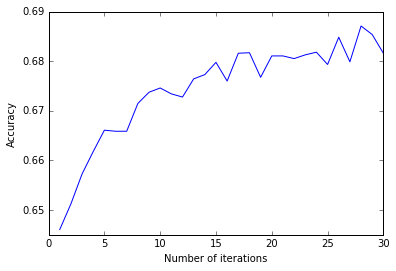

In [21]:
plt.cla()
plt.plot(range(1, num_iters + 1), accuracy)
plt.xlabel('Number of iterations')
plt.ylabel('Accuracy')

### How about grid search?

In [15]:
#We perform grid search on a k-fold split
folds = gl.cross_validation.KFold(train_data, 5)

In [16]:
params = dict([('target', 'safe_loans'), ('max_iterations', range(1, 11)), ('max_depth', range(3, 7))])

In [17]:
job = gl.grid_search.create(folds, gl.boosted_trees_classifier.create, params)

2016-06-12 16:14:27,961 [INFO] graphlab.deploy.job, 22: Validating job.
2016-06-12 16:14:28,805 [INFO] graphlab.deploy.job, 36: Creating a LocalAsync environment called 'async'.
2016-06-12 16:14:28,884 [INFO] graphlab.deploy.map_job, 186: Validation complete. Job: 'Model-Parameter-Search-Jun-12-2016-16-14-2700000' ready for execution
2016-06-12 16:14:29,086 [INFO] graphlab.deploy.map_job, 192: Job: 'Model-Parameter-Search-Jun-12-2016-16-14-2700000' scheduled.
2016-06-12 16:14:35,414 [INFO] graphlab.deploy.job, 22: Validating job.
2016-06-12 16:14:35,446 [INFO] graphlab.deploy.map_job, 220: A job with name 'Model-Parameter-Search-Jun-12-2016-16-14-2700000' already exists. Renaming the job to 'Model-Parameter-Search-Jun-12-2016-16-14-2700000-290e7'.
2016-06-12 16:14:35,461 [INFO] graphlab.deploy.map_job, 186: Validation complete. Job: 'Model-Parameter-Search-Jun-12-2016-16-14-2700000-290e7' ready for execution
2016-06-12 16:14:35,680 [INFO] graphlab.deploy.map_job, 192: Job: 'Model-Param

In [18]:
job.get_results()

max_depth,max_iterations,target,num_folds,fold_id,mean_training_accuracy,mean_validation_accuracy
5,4,safe_loans,5,"[3, 2, 4, 0, 1]",0.696599805355,0.33840125668
5,8,safe_loans,5,"[0, 2, 1, 4, 3]",0.707152175903,0.342216803284
5,6,safe_loans,5,"[1, 0, 2, 3, 4]",0.702974188328,0.342888420201
6,8,safe_loans,5,"[4, 3, 0, 2, 1]",0.719800281525,0.345279712417
3,1,safe_loans,5,"[1, 0, 3, 2, 4]",0.66684346199,0.34517010274
6,1,safe_loans,5,"[3, 2, 4, 1, 0]",0.689405870438,0.333000255642
3,7,safe_loans,5,"[3, 2, 1, 0, 4]",0.686168277264,0.338159198517
5,5,safe_loans,5,"[2, 1, 4, 3, 0]",0.69929330349,0.336655103956
6,9,safe_loans,5,"[3, 2, 1, 0, 4]",0.722614705563,0.342727270693
4,10,safe_loans,5,"[4, 3, 2, 0, 1]",0.700979268551,0.347482868728


In [19]:
job.get_best_params()

{'max_depth': 4, 'max_iterations': 5, 'target': 'safe_loans'}

In [20]:
job.summary()

Model parameter search
-------------------------
Strategy            : grid
Num. combinations   : 200

Current status
-------------------------
Completed           : 200
Running             : 0
Pending             : 0
Failed              : 0
Canceled            : 0

Jobs
-------------------------
Model-Parameter-Search-Jun-12-2016-16-14-2700000-290e7
Model-Parameter-Search-Jun-12-2016-16-14-2700001
Model-Parameter-Search-Jun-12-2016-16-14-2700002

Help
-------------------------
Get status          : self.get_status()
Get exceptions      : self.get_metrics()
Get a single job    : self.jobs[i]


In [21]:
model_best = gl.boosted_trees_classifier.create(train_data, target='safe_loans', max_depth=4, max_iterations=5)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 35160

Number of classes           : 2

Number of feature columns   : 24

Number of unpacked features : 24

+-----------+--------------+-------------------+-------------------+---------------------+---------------------+

| Iteration | Elapsed Time | Training-accuracy | Training-log_loss | Validation-accuracy | Validation-log_loss |

+-----------+--------------+-------------------+-------------------+---------------------+---------------------+

| 1         | 0.062499     | 0.640899          | 0.663143          | 0.640602            | 0.663840            |

| 2         | 0.109376     | 0.642776          | 0.646486          | 0.646916            | 0.646918            |

| 3         | 0.156252     | 0.645392          | 0.636398          | 0.645459            | 0.636965            |

| 4         | 0.218751     | 0.653584          | 0.628736          | 0.648373            | 0.629118            |

| 5         | 0.250003     | 0.655233          | 0.623490          | 0.655172            | 0.624032            |

+-----------+--------------+-------------------+-------------------+---------------------+---------------------+

In [22]:
model_best.evaluate(validation_data)

{'accuracy': 0.6570443774235244,
 'auc': 0.7147228761851149,
 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      -1      |        1        |  1544 |
 |      -1      |        -1       |  3128 |
 |      1       |        -1       |  1640 |
 |      1       |        1        |  2972 |
 +--------------+-----------------+-------+
 [4 rows x 3 columns],
 'f1_score': 0.6511831726555654,
 'log_loss': 0.6260022544814435,
 'precision': 0.6581045172719221,
 'recall': 0.6444058976582827,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 100001
 
 Data:
 +-----------+-----+-----+------+------+
 | threshold | fpr | tpr |  p   |  n   |
 +-----------+-----+-----+------+------+
 |    0.0    | 1.0 | 1.0 | 4612 | 4672 |
 |   1e-05   | 1.0 | 1.0 | 4612 | 4672 |
 |   2e-05   | 1.0 

# Let's try Random Forests

In [22]:
rf_model = gl.random_forest_classifier.create(train_data, target='safe_loans', max_depth=6, max_iterations=10)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Random forest classifier:

--------------------------------------------------------

Number of examples          : 35268

Number of classes           : 2

Number of feature columns   : 24

Number of unpacked features : 24

+-----------+--------------+-------------------+-------------------+---------------------+---------------------+

| Iteration | Elapsed Time | Training-accuracy | Training-log_loss | Validation-accuracy | Validation-log_loss |

+-----------+--------------+-------------------+-------------------+---------------------+---------------------+

| 1         | 0.078128     | 0.655835          | 0.620198          | 0.637622            | 0.635904            |

| 2         | 0.156251     | 0.658869          | 0.618412          | 0.642235            | 0.631606            |

| 3         | 0.218752     | 0.658416          | 0.616721          | 0.643260            | 0.630049            |

| 4         | 0.265629     | 0.659380          | 0.615457          | 0.642235            | 0.630568            |

| 5         | 0.328131     | 0.662158          | 0.615093          | 0.642747            | 0.630021            |

| 6         | 0.390630     | 0.661081          | 0.614905          | 0.647360            | 0.629760            |

+-----------+--------------+-------------------+-------------------+---------------------+---------------------+

In [23]:
rf_model.evaluate(validation_data)

{'accuracy': 0.6546747091770788,
 'auc': 0.7137531474993776,
 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      -1      |        1        |  1763 |
 |      -1      |        -1       |  2909 |
 |      1       |        -1       |  1443 |
 |      1       |        1        |  3169 |
 +--------------+-----------------+-------+
 [4 rows x 3 columns],
 'f1_score': 0.6640821458507964,
 'log_loss': 0.6218868285637539,
 'precision': 0.6425385239253852,
 'recall': 0.6871205550737207,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 100001
 
 Data:
 +-----------+-----+-----+------+------+
 | threshold | fpr | tpr |  p   |  n   |
 +-----------+-----+-----+------+------+
 |    0.0    | 1.0 | 1.0 | 4612 | 4672 |
 |   1e-05   | 1.0 | 1.0 | 4612 | 4672 |
 |   2e-05   | 1.0 

In [24]:
#We try 30 iterations
num_iters = 30
accuracy_rf = np.zeros(30)

In [25]:
for iteration in range(num_iters):
    model = gl.random_forest_classifier.create(train_data, target='safe_loans', max_depth=6, max_iterations=iteration + 1, verbose=False)
    #dummy variable to get accuracy for the model
    foo = model.evaluate(validation_data, metric="accuracy")
    accuracy_rf[iteration] = foo['accuracy']

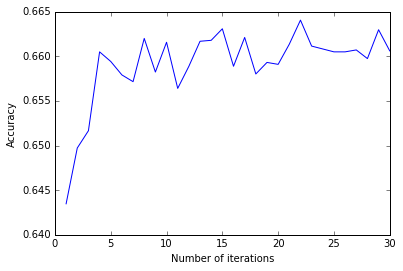

In [26]:
plt.cla()
plt.plot(range(1, num_iters + 1), accuracy_rf)
plt.xlabel('Number of iterations')
plt.ylabel('Accuracy')

In [27]:
print np.argmax(accuracy)
print np.argmax(accuracy_rf)

27
21


In [28]:
accuracy[27]

0.68709607927617411

In [29]:
accuracy_rf[21]

0.6640456699698406

# Performance of a single tree

In [23]:
single_model = gl.decision_tree_classifier.create(train_data, target='safe_loans', max_depth=2)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Decision tree classifier:

--------------------------------------------------------

Number of examples          : 35259

Number of classes           : 2

Number of feature columns   : 24

Number of unpacked features : 24

+-----------+--------------+-------------------+-------------------+---------------------+---------------------+

| Iteration | Elapsed Time | Training-accuracy | Training-log_loss | Validation-accuracy | Validation-log_loss |

+-----------+--------------+-------------------+-------------------+---------------------+---------------------+

| 1         | 0.046876     | 0.623529          | 0.672476          | 0.621429            | 0.673557            |

+-----------+--------------+-------------------+-------------------+---------------------+---------------------+

In [24]:
single_model.evaluate(validation_data)

{'accuracy': 0.6291469194312796,
 'auc': 0.6602848046044268,
 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      -1      |        1        |  1121 |
 |      -1      |        -1       |  3551 |
 |      1       |        -1       |  2322 |
 |      1       |        1        |  2290 |
 +--------------+-----------------+-------+
 [4 rows x 3 columns],
 'f1_score': 0.5708587810046117,
 'log_loss': 0.6717221415046692,
 'precision': 0.6713573732043389,
 'recall': 0.49653078924544664,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 100001
 
 Data:
 +-----------+-----+-----+------+------+
 | threshold | fpr | tpr |  p   |  n   |
 +-----------+-----+-----+------+------+
 |    0.0    | 1.0 | 1.0 | 4612 | 4672 |
 |   1e-05   | 1.0 | 1.0 | 4612 | 4672 |
 |   2e-05   | 1.0